In [10]:
DEVICE = 'cpu' # 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
MODEL_NAME = 'clip'
MODEL_VERSION='ViT-L/14'

## MAIN

### Imports

#### Standard Imports

In [16]:
import os
import sys

In [17]:
import logging

In [18]:
from pathlib import Path

In [19]:
import gc

In [20]:
import pickle

In [21]:
from itertools import product
from functools import reduce

In [22]:
import numpy as np

In [23]:
import matplotlib.pyplot as plt

In [24]:
import torch

In [25]:
from PIL import Image, ImageDraw, ImageOps
import skimage

In [26]:
from tqdm.notebook import tqdm

---

In [27]:
%load_ext rich

#### Custom Imports

In [28]:
sys.path.append('..')

---

In [29]:
# Autoreload Custom Modules
%load_ext autoreload
%autoreload 1

---

In [30]:
from imagelib import Im
%aimport imagelib

In [15]:
from rollout import Rollout, rollout
%aimport rollout

In [ ]:
from inference import infer
%aimport inference

#### Config

In [31]:
np.set_printoptions(linewidth=1000)

In [32]:
plt.set_loglevel('error')

In [33]:
logging.basicConfig(level=logging.DEBUG)

In [34]:
logging.getLogger('imagelib').setLevel(logging.DEBUG)

In [22]:
logging.getLogger('rollout').setLevel(logging.DEBUG)

In [ ]:
logging.getLogger('inference').setLevel(logging.DEBUG)

---

In [35]:
if DEVICE == 'cuda':
    # Empty cache and collect garbage
    logging.debug("> INIT / Clearing CUDA cache and collecting garbage.")
    torch.cuda.empty_cache()
    gc.collect()
    torch.cuda.memory_summary('cuda', abbreviated=True)

#### Model

In [36]:
# Load Model
try:
    if MODEL_NAME == 'clip':
        import clip as Model
    elif MODEL_NAME == 'flatnet':
        from flatnet import FlatNet as Model
    elif MODEL_NAME == 'flatnetlite':
        from flatnet import FlatNetLite as Model
    else:
        raise ValueError(f'> Invalid model name {MODEL_NAME}.')

    model, preprocess = Model.load(MODEL_VERSION, device=DEVICE)
    model.eval()
except RuntimeError as e:
    logging.error(f'> Model loading to {DEVICE} failed.')
    if device == 'cuda':
        logging.debug('> Clearing CUDA cache and collecting garbage.')
        torch.cuda.empty_cache()
        gc.collect()
        torch.cuda.memory_summary('cuda', abbreviated=True)
    raise RuntimeError(e)
else:
    logging.debug(f'> Model loading to {DEVICE} successful.')

DEBUG:root:> Model loading to cpu successful.


# Main

In [1]:
from torchvision import datasets
logging.getLogger('imagelib').setLevel(logging.INFO)

NameError: name 'logging' is not defined

In [ ]:
i = 0

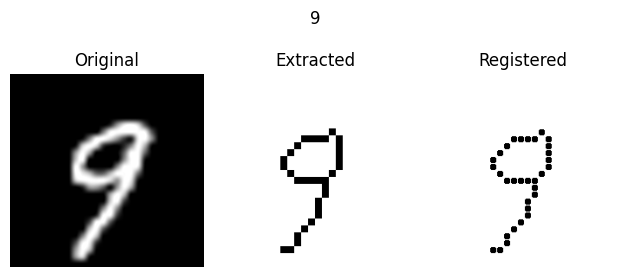

In [89]:
s = 28
original_image, label = datasets.MNIST(root='data/auto')[i]
image, _ = MNISTDataset(skeleton=True, invert=True)[i]
grid_image, _ = MNISTDataset(grid=True, invert=True, grid_width=s, grid_height=s, gridcell_size=8, render_w_grid=False)[i]
i += 1
plt.subplot(131); plt.axis('off'); plt.title(f'Original')
plt.imshow(original_image.resize((s * 8, s * 8), Image.BICUBIC), cmap='gray')
plt.subplot(132); plt.axis('off'); plt.title(f'Extracted')
plt.imshow(image.resize((s * 8, s * 8), Image.BICUBIC), cmap='gray')
plt.subplot(133); plt.axis('off'); plt.title(f'Registered')
plt.imshow(grid_image, cmap='gray')
plt.suptitle(label, y=0.8)
plt.tight_layout()

In [718]:
i -= 2

---

In [111]:
sum = 0
for i in tqdm(range((n := 500))):
    sum += np.array(MNISTDataset()[i][0].resize((160, 160))).sum()
sum /= n
sum

  0%|          | 0/500 [00:00<?, ?it/s]

1124.748

In [112]:
sum = 0
for i in tqdm(range(n)):
    sum += np.array(RandomDataset(p=0.045)[i][0].resize((160, 160))).sum()
sum /= n
sum

  0%|          | 0/500 [00:00<?, ?it/s]

1138.312

In [113]:
sum = 0
for i in tqdm(range(n)):
    sum += np.array(MNISTDataset(grid=True, grid_width=20, grid_height=20, gridcell_size=8, render_w_grid=False)[i][0]).sum()
sum /= n
sum

  0%|          | 0/500 [00:00<?, ?it/s]

1999.53

In [114]:
sum = 0
for i in tqdm(range(n)):
    sum += np.array(RandomDataset(p=0.028, grid=True, grid_width=20, grid_height=20, gridcell_size=8, render_w_grid=False)[i][0]).sum()
sum /= n
sum

  0%|          | 0/500 [00:00<?, ?it/s]

2014.56

---

---